In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math

In [159]:
df = pd.read_excel('datasets\stat-analys\ms-data2-2022.xlsx',sheet_name='2-2',header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elise\AppData\Local\Temp\ipykernel_17428\135660788.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_excel('datasets\stat-analys\ms-data2-2022.xlsx',sheet_name='2-2',header=None)


In [160]:
df.columns=['sample 1','sample 2','sample 3','sample 4','sample 5']


In [161]:
#sns.pairplot(df)

Корреляционная матрица (парные коэффициенты корреляции)

In [162]:
n = 5
m = 60

In [163]:
def covariance(xs, ys):
    dx = xs - xs.mean()
    dy = ys - ys.mean()
    return (dx * dy).sum() / (dx.count() - 1)

C:\Users\elise\AppData\Local\Temp\ipykernel_17428\2630305696.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stds_matrix = np.array([[stds[i]*stds[j] for j in range(n)] for i in range(n)])


<Axes: >

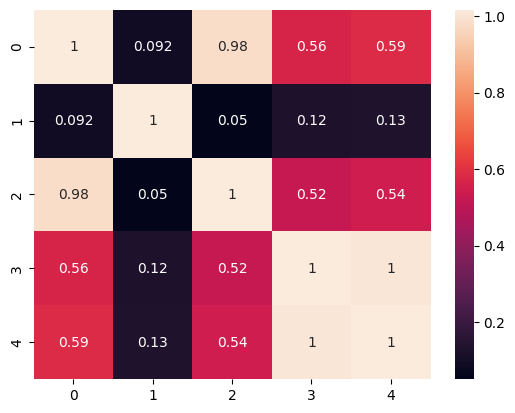

In [164]:
covariance_matrix = np.array([[covariance(df[f'sample {i+1}'],df[f'sample {j+1}']) for j in range(n)] for i in range (n)])
stds = np.std(df,axis = 0)
stds_matrix = np.array([[stds[i]*stds[j] for j in range(n)] for i in range(n)])
correlation_matrix = covariance_matrix/stds_matrix
sns.heatmap(correlation_matrix, annot = True)

Матрица критерия t

C:\Users\elise\AppData\Local\Temp\ipykernel_17428\3133271280.py:1: RuntimeWarning: invalid value encountered in sqrt
  t1 = np.array([[correlation_matrix[i][j]*np.sqrt(m-2)/np.sqrt(1-correlation_matrix[i][j]*correlation_matrix[i][j]) for j in range(n)] for i in range(n)])


t_krit =  1.6706488646505926


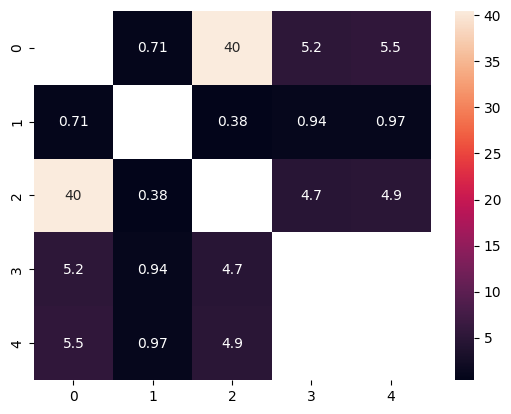

In [165]:
t1 = np.array([[correlation_matrix[i][j]*np.sqrt(m-2)/np.sqrt(1-correlation_matrix[i][j]*correlation_matrix[i][j]) for j in range(n)] for i in range(n)])
t_krit = stats.t.ppf(0.95, m)
sns.heatmap(t1, annot = True)
print('t_krit = ',t_krit)

In [166]:
kp = df.corr()
kp

,sample 1,sample 2,sample 3,sample 4,sample 5
sample 1,1.000000,0.090731,0.966391,0.555217,0.575843
sample 2,0.090731,1.000000,0.049292,0.120813,0.123691
sample 3,0.966391,0.049292,1.000000,0.514799,0.533173
sample 4,0.555217,0.120813,0.514799,1.000000,0.987088
sample 5,0.575843,0.123691,0.533173,0.987088,1.000000


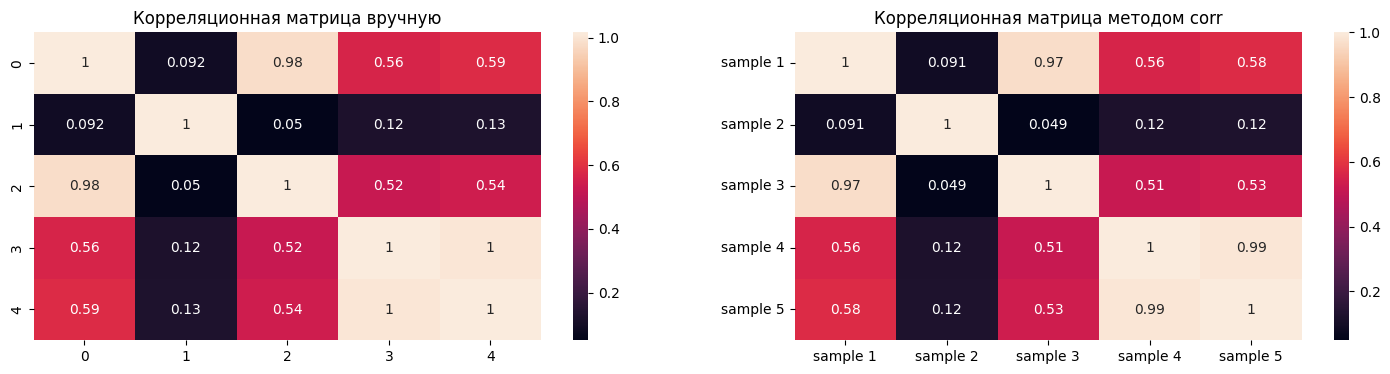

In [167]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.heatmap(correlation_matrix, annot = True)
plt.title("Корреляционная матрица вручную")
plt.subplot(1,2,2)
sns.heatmap(kp, annot = True)
plt.title("Корреляционная матрица методом corr")
plt.show()

In [168]:
ks = df.corr(method='spearman')
ks

,sample 1,sample 2,sample 3,sample 4,sample 5
sample 1,1.000000,0.162686,0.921908,0.761889,0.757999
sample 2,0.162686,1.000000,0.092915,0.117922,0.067130
sample 3,0.921908,0.092915,1.000000,0.715199,0.710475
sample 4,0.761889,0.117922,0.715199,1.000000,0.619339
sample 5,0.757999,0.067130,0.710475,0.619339,1.000000


In [169]:
from scipy.stats import pearsonr,spearmanr
from scipy import stats, linalg

In [170]:
for i in range(1,6):
    for j in range(1,6):
        if i<j:
            print(f'Выборка {i} и {j}')
            pk = pearsonr(df[f'sample {i}'], df[f'sample {j}'])
            print( "Pearson's correlation coefficient", pk[0], "\npvalue", pk[1])
            if pk[1] < 0.05:
                print("+ Корреляция статистически значима, т.к. pvalue < 0.05 ")
            else:
                print("- Корреляция статистически не значима, т.к. pvalue >= 0.05")

Выборка 1 и 2
Pearson's correlation coefficient 0.09073086791040541 
pvalue 0.4905475290744012
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 1 и 3
Pearson's correlation coefficient 0.9663911464474519 
pvalue 6.550510273274292e-36
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 1 и 4
Pearson's correlation coefficient 0.5552170861079185 
pvalue 4.141326545184464e-06
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 1 и 5
Pearson's correlation coefficient 0.5758433561196122 
pvalue 1.4812463792340264e-06
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 2 и 3
Pearson's correlation coefficient 0.04929197814161489 
pvalue 0.7083971230150212
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 2 и 4
Pearson's correlation coefficient 0.12081256847356744 
pvalue 0.357834929402183
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 2 и 5
Pearson's correlation coefficient 0.1236914858448045 
pvalue 0.34

<Axes: >

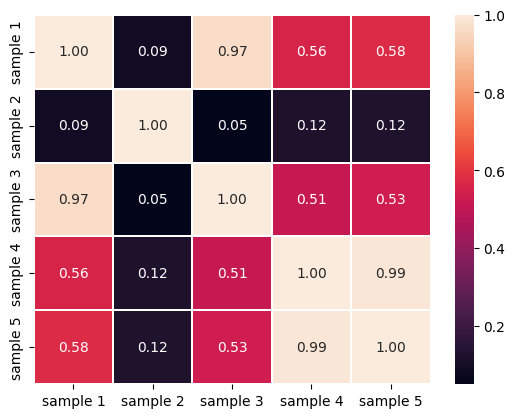

In [171]:
sns.heatmap(kp,annot=True,fmt=".2f", linewidth=.3)

Частные коэффициенты корреляции

In [172]:
import pingouin as pg

In [173]:
def cor2pcor(R):
    inv_cor = linalg.inv(R)
    rows = inv_cor.shape[0]
    regu_1 = 1 / np.sqrt(np.diag(inv_cor))
    regu_2 = np.repeat(regu_1, rows).reshape(rows, rows)
    pcor = (-inv_cor) * regu_1 * regu_2
    np.fill_diagonal(pcor, 1)
    return pcor

<Axes: >

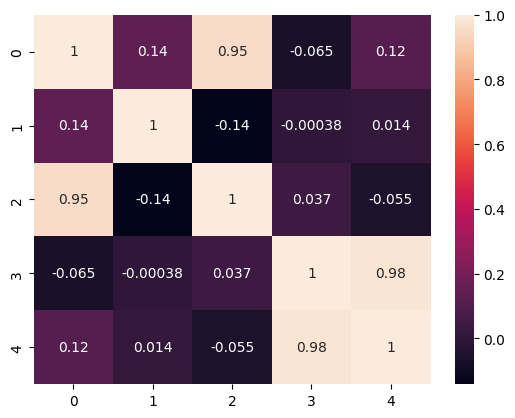

In [174]:
r_pk = cor2pcor(covariance_matrix)
sns.heatmap(r_pk,annot=True)


In [175]:
df.pcorr()

,sample 1,sample 2,sample 3,sample 4,sample 5
sample 1,1.000000,0.141939,0.953974,-0.065409,0.115155
sample 2,0.141939,1.000000,-0.141521,-0.000379,0.014338
sample 3,0.953974,-0.141521,1.000000,0.036974,-0.055424
sample 4,-0.065409,-0.000379,0.036974,1.000000,0.981205
sample 5,0.115155,0.014338,-0.055424,0.981205,1.000000


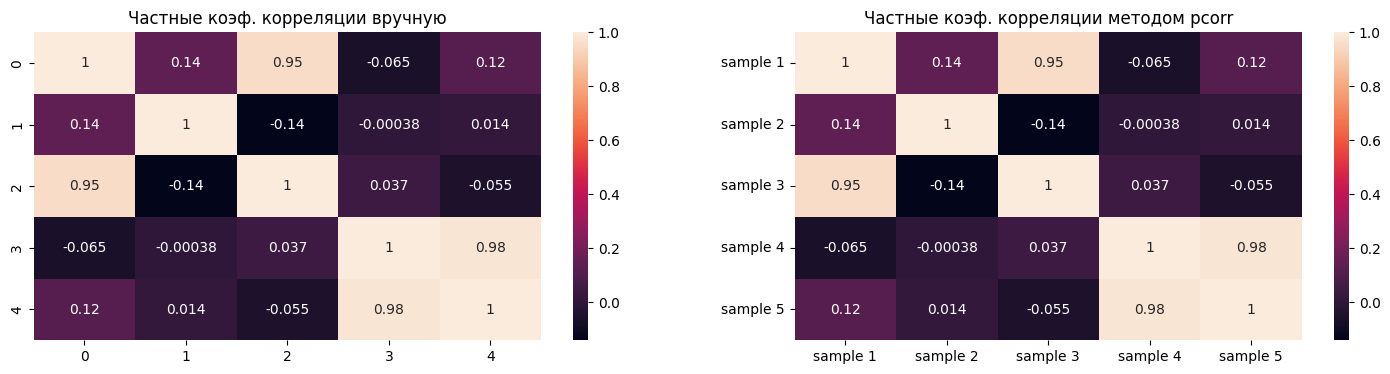

In [176]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.heatmap(cor2pcor(correlation_matrix), annot = True)
plt.title("Частные коэф. корреляции вручную")
plt.subplot(1,2,2)
sns.heatmap(df.pcorr(), annot = True)
plt.title("Частные коэф. корреляции методом pcorr")
plt.show()

In [177]:
t_2 = [[ 0 for i in range(n)] for j in range(n)]
for j in range(n):
    for i in range(n):
        t_2[j][i] = r_pk[j][i]*math.sqrt(m-5)/math.sqrt(1-r_pk[j][i]*r_pk[j][i])
        if i > j:
            if abs(t_2[j][i]) > t_krit:
                print(f"для {j+1}-{i+1} выборок есть связь гипотеза отвергается")
            else: 
                print(f"для {j+1}-{i+1} выборок связи нет гипотеза принимается")
t_2

для 1-2 выборок связи нет гипотеза принимается
для 1-3 выборок есть связь гипотеза отвергается
для 1-4 выборок связи нет гипотеза принимается
для 1-5 выборок связи нет гипотеза принимается
для 2-3 выборок связи нет гипотеза принимается
для 2-4 выборок связи нет гипотеза принимается
для 2-5 выборок связи нет гипотеза принимается
для 3-4 выборок связи нет гипотеза принимается
для 3-5 выборок связи нет гипотеза принимается
для 4-5 выборок есть связь гипотеза отвергается


C:\Users\elise\AppData\Local\Temp\ipykernel_17428\974889090.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  t_2[j][i] = r_pk[j][i]*math.sqrt(m-5)/math.sqrt(1-r_pk[j][i]*r_pk[j][i])


[[inf,
  1.0634133365206508,
  23.591611151577126,
  -0.4861260441851023,
  0.8597347085680126],
 [1.0634133365206442,
  inf,
  -1.06021941160807,
  -0.002812864644620619,
  0.1063436306566267],
 [23.59161115157695,
  -1.060219411608076,
  inf,
  0.27439060164958173,
  -0.4116698684856514],
 [-0.4861260441851907,
  -0.0028128646445750955,
  0.2743906016496716,
  inf,
  37.7102523905213],
 [0.8597347085681021,
  0.10634363065658273,
  -0.41166986848574105,
  37.710252390520836,
  inf]]

Множественные коэф корреляции

In [178]:
minor11 = correlation_matrix.copy()
minor11 = np.delete(minor11, 0, axis=0)
minor11 = np.delete(minor11, 0, axis=1)
for i in range(2, n):
    minor1i = correlation_matrix.copy()
    minor1i = np.delete(minor1i, 0, axis=0)
    minor1i = np.delete(minor1i, i-1, axis=1)
    
    minorii = correlation_matrix.copy()
    minorii = np.delete(minorii, i-1, axis=0)
    minorii = np.delete(minorii, i-1, axis=1)
    

In [179]:
r3 = np.sqrt(1 - linalg.det(correlation_matrix)/linalg.det(minor11))
r3.round(5)

0.96929

Проверка значимости

In [180]:
t3 = (r3*r3*(m-5))/((1-r3*r3)*4)
t3_krit = 2.5397
if (t3 > t3_krit):
    print('гипотеза отвергается, т.к. t =',t3,' > ',  't_крит =',t_krit)
else:
    print('гипотеза принимается')

гипотеза отвергается, т.к. t = 213.60727626587612  >  t_крит = 1.6706488646505926


Ранговые коэффициенты корреляции

In [184]:
spearmanr(df[f'sample {1}'], df[f'sample {2}'])

SignificanceResult(statistic=0.16268633908681832, pvalue=0.21425593011960184)

In [185]:
for i in range(1,6):
    for j in range(1,6):
        if i<j:
            print(f'Выборка {i} и {j}')
            sk = spearmanr(df[f'sample {i}'], df[f'sample {j}'])
            print( "Rank(Spearman's) correlation coefficient", sk[0], "\npvalue", sk[1])
            if sk[1] < 0.05:
                print("+ Корреляция статистически значима, т.к. pvalue < 0.05 ")
            else:
                print("- Корреляция статистически не значима, т.к. pvalue >= 0.05")


Выборка 1 и 2
Rank(Spearman's) correlation coefficient 0.16268633908681832 
pvalue 0.21425593011960184
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 1 и 3
Rank(Spearman's) correlation coefficient 0.9219077787466344 
pvalue 1.4664482407544477e-25
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 1 и 4
Rank(Spearman's) correlation coefficient 0.7618888843314361 
pvalue 1.5536826412254203e-12
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 1 и 5
Rank(Spearman's) correlation coefficient 0.7579988608519903 
pvalue 2.342721369035036e-12
+ Корреляция статистически значима, т.к. pvalue < 0.05 
Выборка 2 и 3
Rank(Spearman's) correlation coefficient 0.09291469852736872 
pvalue 0.4801234990792671
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 2 и 4
Rank(Spearman's) correlation coefficient 0.1179216449013615 
pvalue 0.36953814877257385
- Корреляция статистически не значима, т.к. pvalue >= 0.05
Выборка 2 и 5
Rank(Spearman's) cor